**Disclaimer**
<br>This model is adapted from [House prices prediction using keras](https://www.kaggle.com/code/hugosjoberg/house-prices-prediction-using-keras) (One example from the competition)



In [113]:
from tensorflow import keras
from keras.models import Sequential
from keras import metrics
from keras.layers import Activation, Dense

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


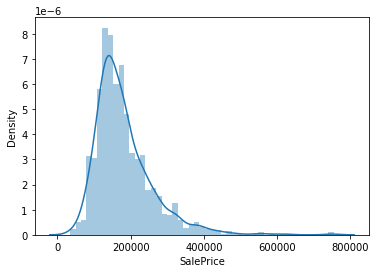

In [114]:
train = pd.read_csv('https://raw.githubusercontent.com/Python-Elective-2022/regression---final-project-tanatlert/main/house-prices-for-competition/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Python-Elective-2022/regression---final-project-tanatlert/main/house-prices-for-competition/test.csv',engine="python")

#fill na with mean
train = train.fillna(train.mean())
test = test.fillna(test.mean())

#preview the sale price
sns.distplot(train['SalePrice'])


**Choosing X and Y inputs**<br>
checking to see the relevent associations in each column

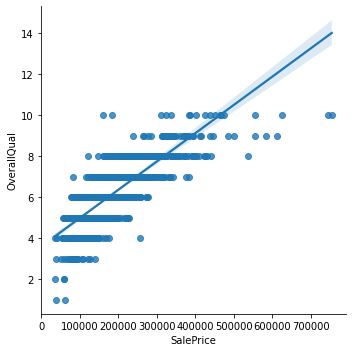

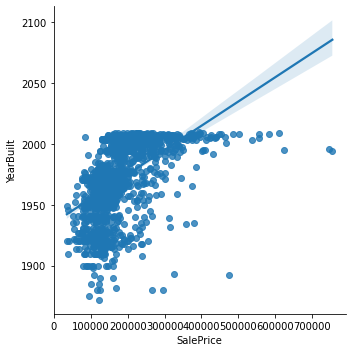

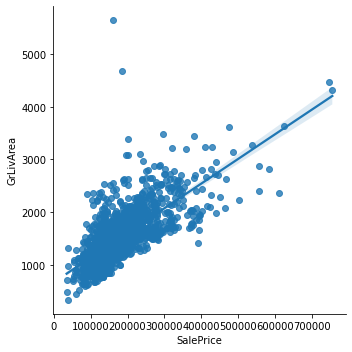

In [115]:

#sns.pairplot(train, kind='reg');
#After view through all the pattern (which take a long time to compute), here are possible x_train data

sns.lmplot(x='SalePrice', y='OverallQual', data=train)
sns.lmplot(x='SalePrice', y='YearBuilt', data=train)
sns.lmplot(x='SalePrice', y='GrLivArea', data=train)



In [116]:
train = pd.get_dummies(train)
#fill na with mean
train = train.fillna(train.mean())

X_train = train[['YearBuilt','GrLivArea','OverallQual']]
y_train = train['SalePrice'].values

scale = StandardScaler()
X_train = scale.fit_transform(X_train)


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33)


In [117]:
def create_model(): #adapt from reference code
  model = Sequential()
  model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(70, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(1))
  # Compile model
  model.compile(optimizer ='adam', loss = 'mean_squared_error', 
            metrics =[metrics.mae])
  return model

model = create_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 10)                40        
                                                                 
 dense_85 (Dense)            (None, 40)                440       
                                                                 
 dense_86 (Dense)            (None, 50)                2050      
                                                                 
 dense_87 (Dense)            (None, 70)                3570      
                                                                 
 dense_88 (Dense)            (None, 30)                2130      
                                                                 
 dense_89 (Dense)            (None, 1)                 31        
                                                                 
Total params: 8,261
Trainable params: 8,261
Non-train

In [118]:
#Use column times 3 to represent number of epochs
print("Appropiate epoach is atleast",len(train.columns)*3)

Appropiate epoach is atleast 870


Epoch 1/870
31/31 [==============================] - 2s 14ms/step - loss: 39211319296.0000 - mean_absolute_error: 180726.4219 - val_loss: 38688788480.0000 - val_mean_absolute_error: 181312.7031
Epoch 2/870
31/31 [==============================] - 0s 8ms/step - loss: 39207096320.0000 - mean_absolute_error: 180715.4375 - val_loss: 38676041728.0000 - val_mean_absolute_error: 181280.2812
Epoch 3/870
31/31 [==============================] - 0s 8ms/step - loss: 39154642944.0000 - mean_absolute_error: 180582.4688 - val_loss: 38533771264.0000 - val_mean_absolute_error: 180928.7500
Epoch 4/870
31/31 [==============================] - 0s 7ms/step - loss: 38685642752.0000 - mean_absolute_error: 179488.8125 - val_loss: 37523771392.0000 - val_mean_absolute_error: 178487.9531
Epoch 5/870
31/31 [==============================] - 0s 7ms/step - loss: 36380672000.0000 - mean_absolute_error: 173787.1250 - val_loss: 33040623616.0000 - val_mean_absolute_error: 167435.8438
Epoch 6/870
31/31 [===============

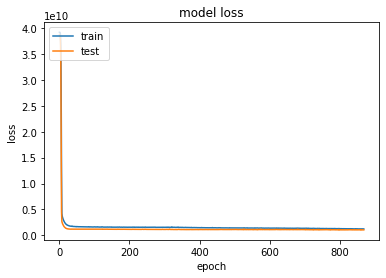

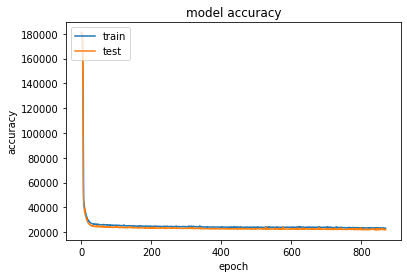

In [119]:


history = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=870, batch_size=32)

#training loss (from reference code)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#accuracy $ (from reference code)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# This model has $25k inaccuracy in the price range of ~800k


In [120]:
#generate .csv submission

df_test = test
cols = ['OverallQual', 'GrLivArea',  'YearBuilt']
id_col = df_test['Id'].values.tolist()
df_test['GrLivArea'] = np.log1p(df_test['GrLivArea'])
df_test = pd.get_dummies(df_test)
df_test = df_test.fillna(df_test.mean())
X_test = df_test[cols].values
# Always standard scale the data before using NN
scale = StandardScaler()
X_test = scale.fit_transform(X_test)

prediction = model.predict(X_test)
submission = pd.DataFrame()
submission['Id'] = id_col
submission['SalePrice'] = prediction
submission.to_csv('submission.csv', index=False)

46/46 [==============================] - 0s 2ms/step


**Compare the Price and prediction Price** 

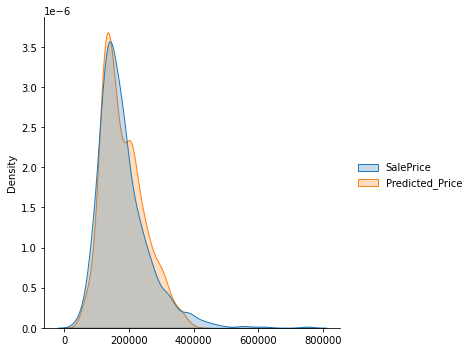

In [121]:
#rename sale test name to compare with the train data
submission.rename(columns = {'SalePrice':'Predicted_Price'}, inplace = True)

#concat 
display = pd.concat([train['SalePrice'],submission['Predicted_Price']], axis=1)
sns.displot(data=display,kind='kde',fill=True)
